In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Iterable

In [3]:
def load_file(path: str, lower_bound: float = 0.0, upper_bound: float = 1.0) -> Tuple[np.ndarray]:
    times = []
    x_pos = []
    y_pos = []
    polar = []
    with open(os.path.join(path, 'events.txt')) as f:
        data = f.read().splitlines()
        print(data[-1])
        for line in data:
            t, x, y, p = line.split()
            if float(t) < lower_bound:
                times.append(float(t))
                x_pos.append(int(x))
                y_pos.append(int(y))
                polar.append(int(p))
            if float(t) > upper_bound: break

    times = np.array(times, dtype=float)
    x_pos = np.array(x_pos, dtype=int)
    y_pos = np.array(y_pos, dtype=int)
    polar = np.array(polar, dtype=bool)

    return times, x_pos, y_pos, polar




In [9]:
times, x_pos, y_pos, polar = load_file('shapes_rotation')

59.798386001 149 38 0


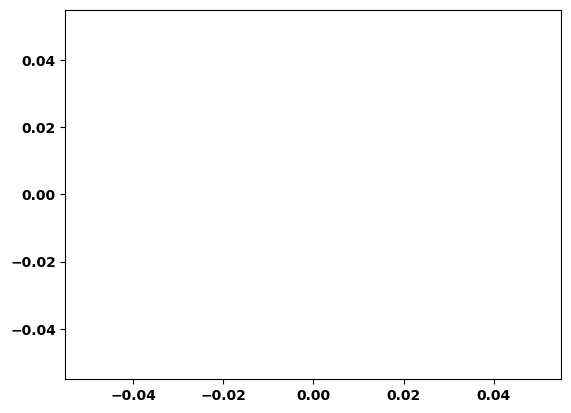

In [11]:
plt.scatter(x_pos, y_pos, c=polar)

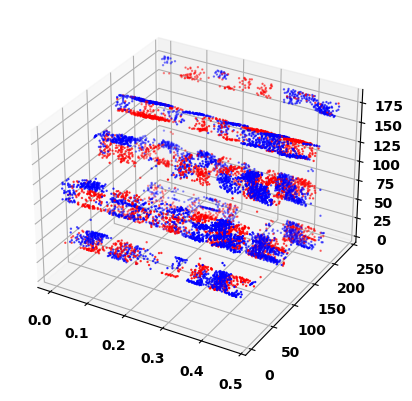

In [16]:
count = 8000
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(times[:count], x_pos[:count], y_pos[:count], c=polar[:count], cmap='bwr', s=0.5)
ax.grid()
plt.show()

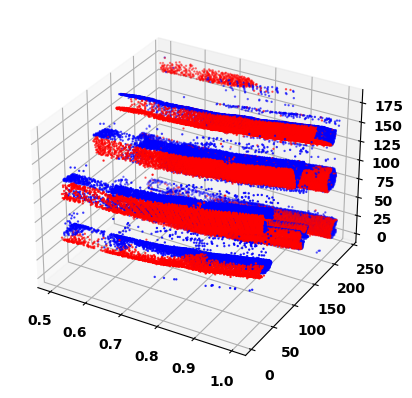

In [15]:
predicate = .5 < times
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(times[predicate], x_pos[predicate], y_pos[predicate], c=polar[predicate], cmap='bwr', s=0.5)
ax.grid()
plt.show()

Q:
- data is about one minute long
- resolution is about 1E-6[s]
- polarity stands for whether pixel got brighter or dimmer
- towards right

In [4]:
times, x_pos, y_pos, polar = load_file('shapes_rotation', 1.0, 2.0)

59.798386001 149 38 0


In [5]:
def process(
        times: np.ndarray, 
        x_pos: np.ndarray, 
        y_pos: np.ndarray, 
        polar: np.ndarray, 
        image_spahe: Tuple[int], 
        tau: float = 1e-3,
        step: float = 1e-3
    ) -> Iterable[np.ndarray]:
    last_updated = np.zeros(image_spahe, dtype=float)
    img = np.ones(image_spahe, dtype=np.uint8)*127
    stamp = 0
    for t, x, y, p in zip(times, x_pos, y_pos, polar):
        img[x, y] = 255 if p else 0
        last_updated[x, y] = t
        img[last_updated < t - tau] = 127
        if t > stamp:
            stamp += step
            yield img.copy()

In [8]:

try:
    for img in process(times, x_pos, y_pos, polar, (240, 180), 1e-2):
        cv2.imshow('img', img)
        cv2.waitKey(1)
    cv2.destroyAllWindows()
except KeyboardInterrupt:
    cv2.destroyAllWindows()

The greather the parameter $\tau$ the greater "motion blur" is left.